<a href="https://colab.research.google.com/github/ddezouza/Data110/blob/main/DanielaMelo_Data110_FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Crashes in Montgomery County
#### By: Daniela Melo

## Introduction
Car accidents are a very common phenomenon in the United States. Thankfully, however, a majority of car crashes result in either no injury, or only minor injuries. I wanted, however, to have a closer look at car crashes that did have a major impact, and what common trends were associated with these more serious car crashes. To examine all car crash related data in the United States would likely be too complex for this course, and require more time than what we had for our final project, so instead I chose to focus on a more local area. I utilized the catalog.data.gov data repository to look at data sources associated with Montgomery County, and selected the Crash Reporting - Drivers Data dataset (available for download [here](https://catalog.data.gov/dataset/crash-reporting-drivers-data/)).

The dataset comprises of information on  crashes on county and local roadways. The dataset reports details of all within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police.

In looking at the dataset, I wanted to identify patterns and trends associated with car crashes in Montgomery County, and, if possible, identify potential common factors that resulted in serious, or fatal injuries to drivers associated with the crash.


### Data Analysis and Visualization

In [67]:
### Set up: Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install rpy2
!pip install joypy
import plotly
import folium
import plotly.graph_objects as go
import plotly.express as px

In [10]:
#Importing Data File
df=pd.read_csv('/content/CrashesMontgomeryCounty.csv', parse_dates=['Crash Date/Time'])

<ipython-input-10-53a6b19663ee>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/CrashesMontgomeryCounty.csv', parse_dates=['Crash Date/Time'])
<ipython-input-10-53a6b19663ee>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/CrashesMontgomeryCounty.csv', parse_dates=['Crash Date/Time'])


In [4]:
#Preliminary Review of Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196043 entries, 0 to 196042
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Report Number                  196043 non-null  object        
 1   Local Case Number              196043 non-null  object        
 2   Agency Name                    196043 non-null  object        
 3   ACRS Report Type               196043 non-null  object        
 4   Crash Date/Time                196043 non-null  datetime64[ns]
 5   Route Type                     176889 non-null  object        
 6   Road Name                      174842 non-null  object        
 7   Cross-Street Name              165057 non-null  object        
 8   Off-Road Description           18116 non-null   object        
 9   Municipality                   19126 non-null   object        
 10  Related Non-Motorist           6328 non-null    object        
 11  

In [20]:
#Vehicle Year has rows with values that are not years on them, so I have to exclude those to change that column to datetime.
exclude=[0,1,2,3,4,8,13,14,15,97,99,198,200,201,202,215,999,1000,1005,1008,1012,1014,1015,1025,1111,1140,1234,1900,1901,1911,2026,2027,2033,2040,2041,2048,2055,2099,2100,2101,2102,2103,2104,2105,2107,2109,2200,2201,2204,2205,2208,2222,2911,2912,2914,2915,2916,2917,2918,2919,2991,2996,2997,2998,3003,3012,3013,3863,5005,7817,8008,8888,9000,9999]
df=df[~df['Vehicle Year'].isin(exclude)]

In [28]:
#Changing Vehicle Year data format and extracting Year and Month from Crash Date
df['Vehicle Year']=pd.to_datetime(df['Vehicle Year'], format='%Y')
df['Vehicle Year']= pd.DatetimeIndex(df['Vehicle Year']).year
df['Crash Year']= pd.DatetimeIndex(df['Crash Date/Time']).year
df['Crash Month'] = pd.DatetimeIndex(df['Crash Date/Time']).month
df['Crash Month Name'] = pd.to_datetime(df['Crash Month'], format='%m').dt.month_name()


In [37]:
#Recoding Injury Severity values
recode_dict={'NO APPARENT INJURY':'No Apparent Injury','FATAL INJURY':'Fatal Injury','POSSIBLE INJURY':'Possible Injury','SUSPECTED MINOR INJURY':'Suspected Minor Injury','SUSPECTED SERIOUS INJURY':'Suspected Serious Injury'}
df['Injury Severity']=df['Injury Severity'].replace(recode_dict)

In [42]:
#Ordering Injury Severity Values
IS_categories = ['No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury','Suspected Serious Injury','Fatal Injury']
df['Injury Severity'] = pd.Categorical(df['Injury Severity'], categories=IS_categories, ordered=True)
df_sorted = df.sort_values(by='Injury Severity')


In [52]:
df.describe()

,Crash Date/Time,Speed Limit,Vehicle Year,Latitude,Longitude,Crash Year,Crash Month
count,191131,191131.000000,191131.000000,191131.000000,191131.000000,191131.000000,191131.000000
mean,2019-12-14 04:37:04.771596032,32.408034,2011.132558,39.083274,-77.112293,2019.443921,6.597648
min,2015-01-01 00:30:00,0.000000,1930.000000,37.720000,-79.486000,2015.000000,1.000000
25%,2017-05-02 14:01:00,25.000000,2007.000000,39.024722,-77.189373,2017.000000,4.000000
50%,2019-08-23 10:00:00,35.000000,2012.000000,39.075010,-77.105564,2019.000000,7.000000
75%,2022-09-06 14:03:00,40.000000,2016.000000,39.139899,-77.039387,2022.000000,10.000000
max,2025-04-30 21:30:00,75.000000,2025.000000,39.990414,-75.527708,2025.000000,12.000000
std,NaN,11.168014,6.525120,0.071906,0.098326,3.017918,3.492476


In [80]:
#I chose to isolate crashes resulting in injuries, since that was the factor I was most interested in.
df_injuries=df[df['Injury Severity'].isin(['Possible Injury','Suspected Minor Injury','Suspected Serious Injury','Fatal Injury'])]
#Ordering Injury Severity Values for injuries DF
IS_categories = ['Possible Injury', 'Suspected Minor Injury','Suspected Serious Injury','Fatal Injury']
df_injuries['Injury Severity'] = pd.Categorical(df_injuries['Injury Severity'], categories=IS_categories, ordered=True)



<ipython-input-80-36b9af398a2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injuries['Injury Severity'] = pd.Categorical(df_injuries['Injury Severity'], categories=IS_categories, ordered=True)


#### Figure 1

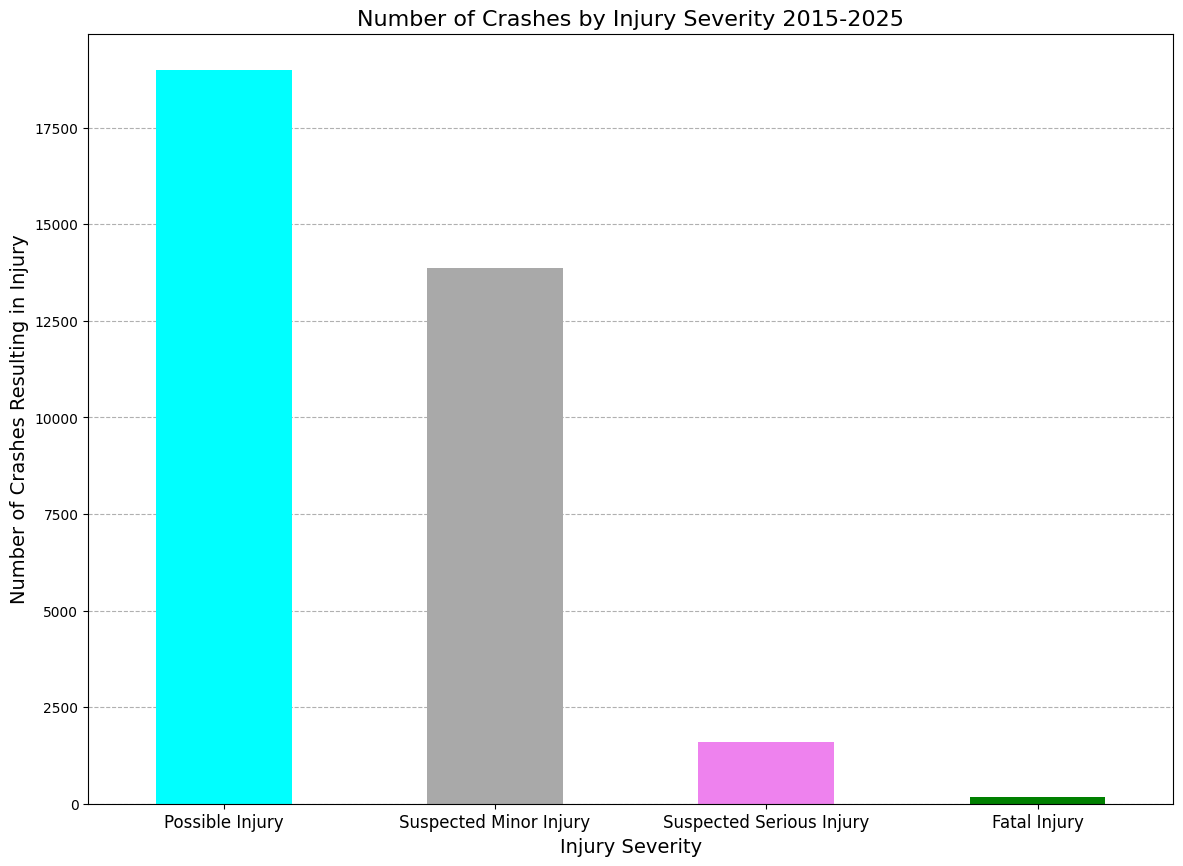

In [114]:
plt.figure(figsize=(14,10))
df_injuries['Injury Severity'].value_counts().plot.bar(color=['cyan','darkgrey','violet','green'],zorder=2)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('Injury Severity', fontsize=14)
plt.ylabel('Number of Crashes Resulting in Injury', fontsize=14)
plt.title('Number of Crashes by Injury Severity 2015-2025',fontsize=16)
plt.grid(axis='y',linestyle='--',zorder=0)
plt.show()

#### Comments:
I first chose to have a clear view of the number of crashes associated with each injury category available in the dataset (excluding the 'no apparent injuries' category since I was most interested in crashes that did result in injury. As can be seen in the bargraph above, crashes resultant in possible or minor injuries vastly outnumber those that result in serious or fatal injuries.

#### Figure 2

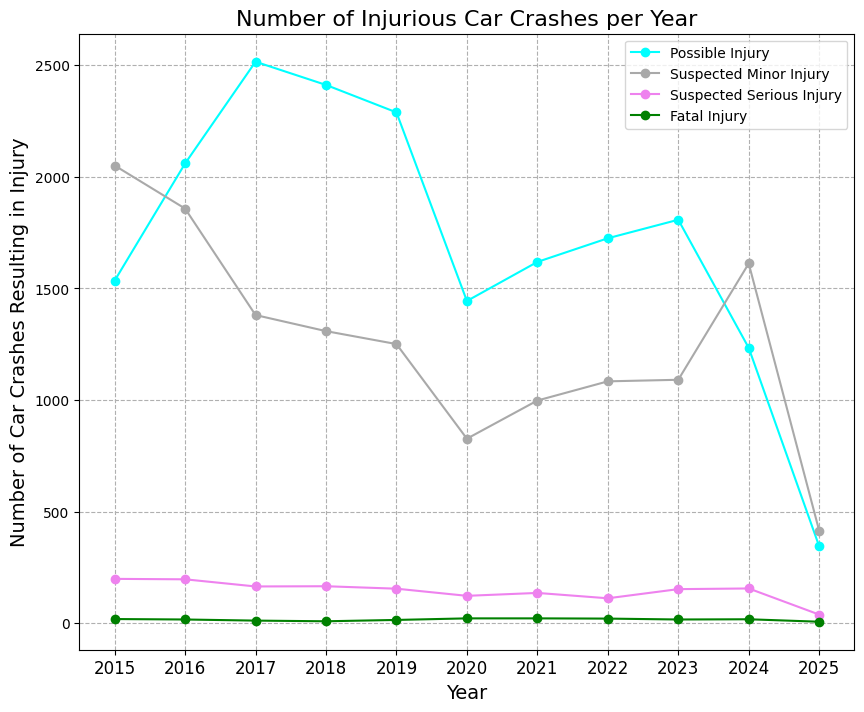

In [122]:
yearly_counts = df['Crash Year'].value_counts().sort_index()
#Need counts per year, for each category of injury
df_NI=df[df['Injury Severity']=='No Apparent Injury']
df_PI=df[df['Injury Severity']=='Possible Injury']
df_SMI=df[df['Injury Severity']=='Suspected Minor Injury']
df_SSI=df[df['Injury Severity']=='Suspected Serious Injury']
df_FI=df[df['Injury Severity']=='Fatal Injury']

#Getting Year Counts:
year_NI = df_NI['Crash Year'].value_counts().sort_index()
year_PI = df_PI['Crash Year'].value_counts().sort_index()
year_SMI = df_SMI['Crash Year'].value_counts().sort_index()
year_SSI = df_SSI['Crash Year'].value_counts().sort_index()
year_FI = df_FI['Crash Year'].value_counts().sort_index()

#Plotting
plt.figure(figsize=(10,8))
plt.plot(year_PI.index, year_PI.values, marker='o',color='cyan',label="Possible Injury")
plt.plot(year_SMI.index, year_SMI.values, marker='o',color='darkgrey',label="Suspected Minor Injury")
plt.plot(year_SSI.index, year_SSI.values, marker='o',color='violet',label="Suspected Serious Injury")
plt.plot(year_FI.index, year_FI.values, marker='o',color='green',label="Fatal Injury")

plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Car Crashes Resulting in Injury',fontsize=14)
plt.title('Number of Injurious Car Crashes per Year',fontsize=16)
plt.xticks(yearly_counts.index, fontsize=12)
plt.grid(linestyle='--',zorder=0)
plt.legend()
plt.show()

#### Comments:
I chose to have a look at whether the number of crashes that resulted in these injury categories varied year by year. I wanted to see whether the pandemic, in 2020, had a significant effect. Interestingly, while there was a major drop in crashes resulting in possible or minor injury in 2020, and a slight drop in the number of crashes resulting in serious injury, there was actually a slight increase in the number of crashes resulting in fatal injuries between 2019 and 2020. Since we're not yet through 2025, we only see the number of crashes up until May for 2025 - It'd be interesting to see whether at the end of the year numbers will be comparable to 2024.

#### Figure 3:

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


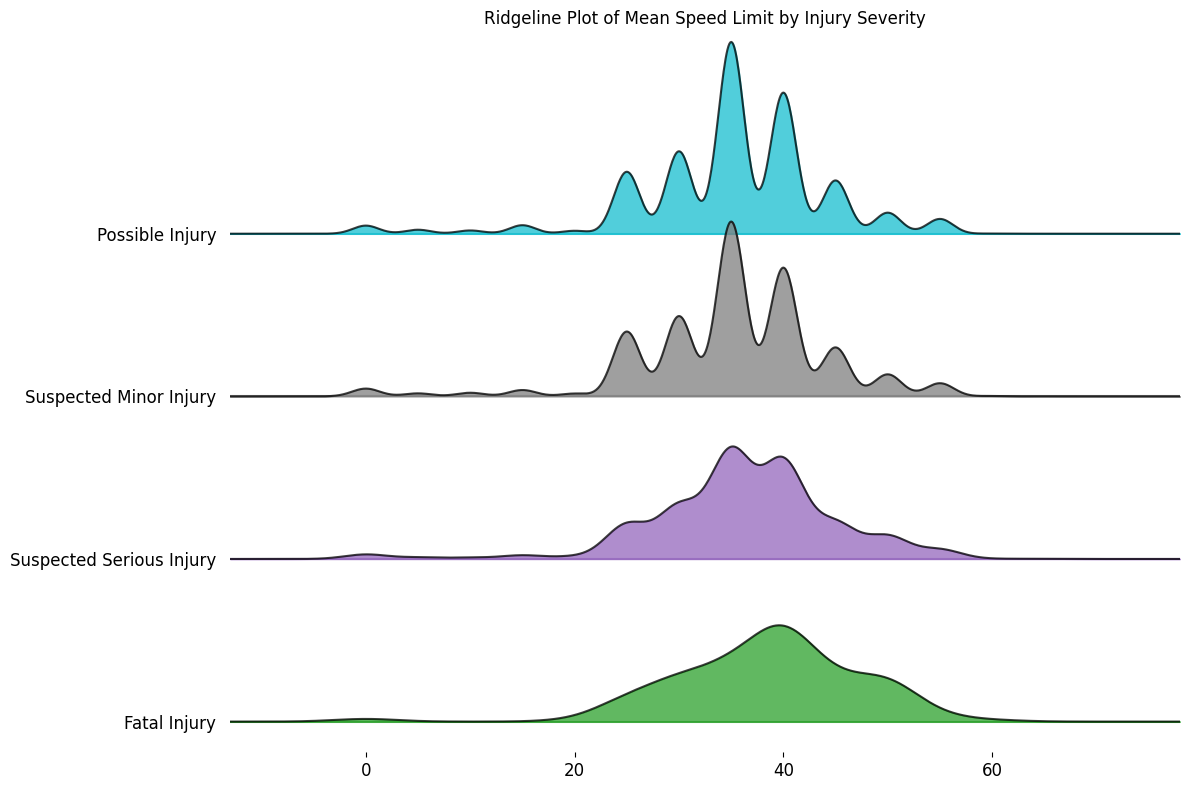

In [87]:
from joypy import joyplot
fig, axes = joyplot(df_injuries,
                    by='Injury Severity',
                    column='Speed Limit',
                    figsize=(12, 8),
                    colormap=plt.cm.tab10_r,
                    ylabelsize=12,
                    xlabelsize=12,
                    title="Ridgeline Plot of Mean Speed Limit by Injury Severity",
                    alpha=0.75)
plt.show()

### Comments:
I wanted to review how speed limit was associated with the type of resulting injury in a car crash. Looking at the speed limit distribution, it is clear that while car crashes that result in minor injury are spread through a variety of speed limitations, serious and fatal injury car crashes have much less variation, and peak for roads with speed limits around 40 miles per hour.

#### Figure 4:

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


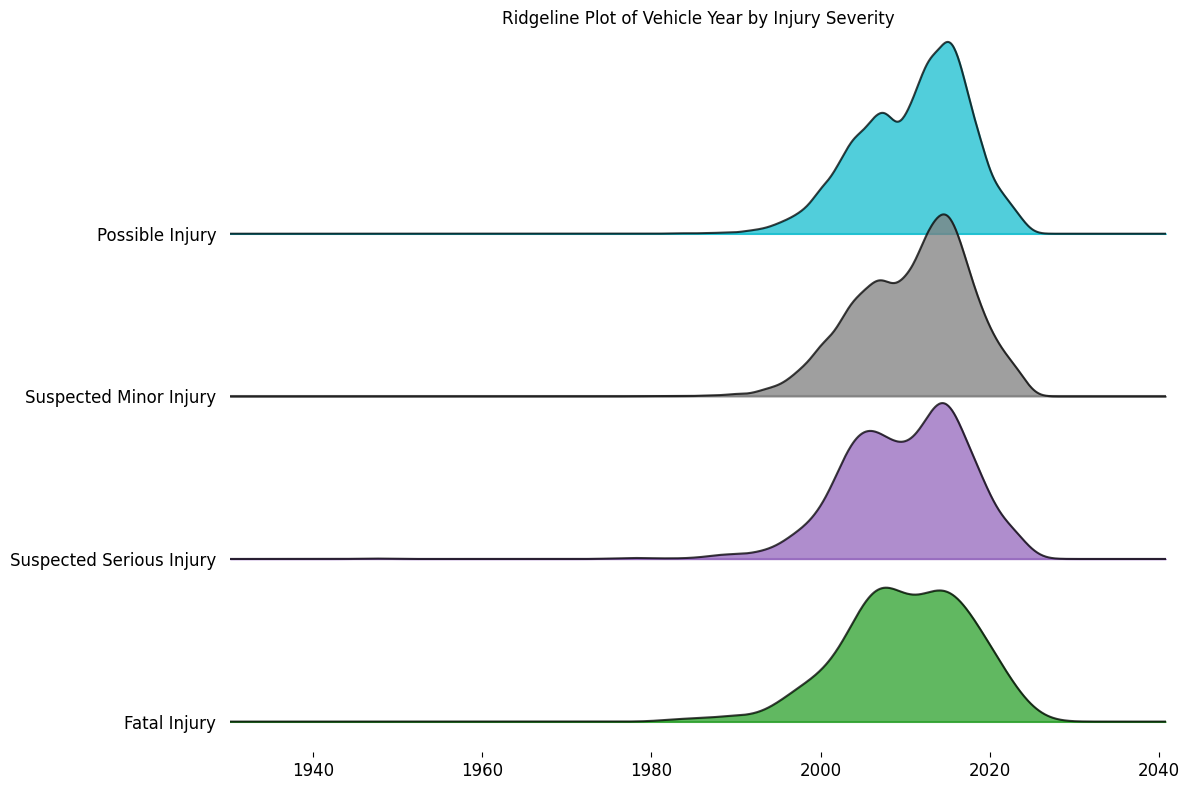

In [118]:
from joypy import joyplot
fig, axes = joyplot(df_injuries,
                    by='Injury Severity',
                    column='Vehicle Year',
                    figsize=(12, 8),
                    colormap=plt.cm.tab10_r,
                    ylabelsize=12,
                    xlabelsize=12,
                    title="Ridgeline Plot of Vehicle Year by Injury Severity",
                    alpha=0.75)
plt.show()

#### Comments:
I wanted to see whether there was any relationship between how old a vehicle was and whether crashes were more likely to result in serious or fatal injury. While the ridgeline plot does show newer vehicles are more associated with possible or minor injuries in crashes, there isn't a significant skew for older vehicles when it comes to serious or fatal injuries. This is not as clear as I'd have liked in the ridgeline plot, so I played around with Tableau a little and created an alternative visualization that can be seen below.

In [116]:
%%html
<div class='tableauPlaceholder' id='viz1747195397676' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Data110_FinalProject&#47;Sheet1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1747195397676');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### Figure 5:


In [117]:
%%html
<div class='tableauPlaceholder' id='viz1747195925821' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Data110_FinalProject&#47;Sheet4' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1747195925821');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### Comments:

Beyond speed limits, I was interested to see whether partcular route types were more associated with serious or fatal car crashes. Interestingly, most crashes resulting in serious injury occurred in state and county routes. Smaller routes, such as local and municipal routes, had a much lower share of serious car crashes.

#### Figure 6

In [119]:
%%html
<div class='tableauPlaceholder' id='viz1747196408838' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Data110_FinalProject&#47;Sheet3' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1747196408838');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### Comments:
Another key factor I wanted to have a look at was the impact of weather. A majority of injury resulting car crashes occur in clear weather, possibly because drivers are more careful when driving in bad weather. Fatal injury causing crashes made up a greater perccentage of clear weather crashes than of any other weather category as well.

#### Figure 7:

In [106]:
map_center = [df_injuries['Latitude'].mean(), df_injuries['Longitude'].mean()]
from folium.plugins import HeatMap

m = folium.Map(
    location=map_center,
    zoom_start=15
)

HeatMap(df_injuries[['Latitude', 'Longitude']].values).add_to(m)

m

#### Comments:
I decided to have a closer look at crashes and their locations. Based on the route types more closely associated with crashes, It is very interesting to see the clustering reflected on the heat map. Zooming in, it is clear that clusters often occur at intersections, but while state routes in MC do tend to show higher numbers of crashes (such as on Rockville Pike) we do see some exceptions. MD 200, for example, shows very few crashes. It is possible that, since it is a toll road, a reduced traffic volume results in fewer crashes overall.

#### Figure 8:

In [120]:
%%html
<div class='tableauPlaceholder' id='viz1747196816814' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;Data110_FinalProject&#47;Sheet2?:language=en-US&amp;:embed=true&amp;:sid=&amp;:redirect=auth' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1747196816814');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### Comments:
I chose to use Tableau to try and look at location data in more detail. Because tableau makes it a bit easier to filter by year and injury severity, it made it easier to see how some routes have only had serious crashes occur in more recent years.

#### Figure 9:

In [121]:
%%html
<div class='tableauPlaceholder' id='viz1747197025807' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet5&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;Data110_FinalProject&#47;Sheet5?:language=en-US&amp;:embed=true&amp;:sid=&amp;:redirect=auth' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;Data110_FinalProject&#47;Sheet5&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1747197025807');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### Comments:

Focusing only on crashes resulting in serious or fatal injuries, I chose to explore the locations and speed limits at which those crashes occurred. Interestingly, crashes resulting in serious injury had much lower overlap in location with fatal injury crashes than I expected. There is of course, some overlap, but there are several areas where the clusters only include serious injury crashes, with no reported fatal injuries.

### Conclusion

When looking at car crashes in Montgomery County, specifically those resulting in injury, multiple factors may contribute to the severity of a crash.

High severity crashes tend to occur mostly in State Routes in MC, usually clustered around intersections, and in routes with speed limits around 40 mph. Toll Roads and smaller, local and municipal routes tend to be less associated with high severity crashes.

Interestingly, most serious crashes in Montgomery County tend to occur in clear weather. Older cars are not necessarily more likely to be involved in serious or fatal car crashes.

The Pandemic resulted in a significant drop in car crashes overall, but had little impact on the number of car crashes resulting in fatal injury, which bucked the general trend.

For future analysis, I'd be interested in looking at whether 2025 mirrors the results we see for 2024. Additionally, I'd like to do a more in depth analysis on what vehicle types are most involved in high severity car crashes.